In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
data=pd.read_csv('/content/sample_data/heart_disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [44]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [45]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [91]:
data.shape

(908, 14)

In [92]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
col           int64
dtype: object

In [48]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [49]:
data.duplicated().sum()

1

In [50]:
correlation=data.corr(numeric_only=True)
correlation

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000


<Axes: >

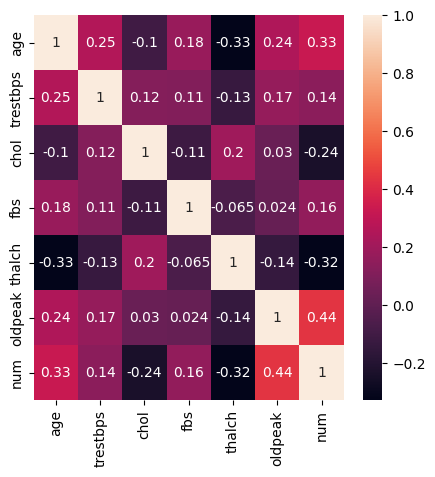

In [52]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(numeric_only=True),annot=True)

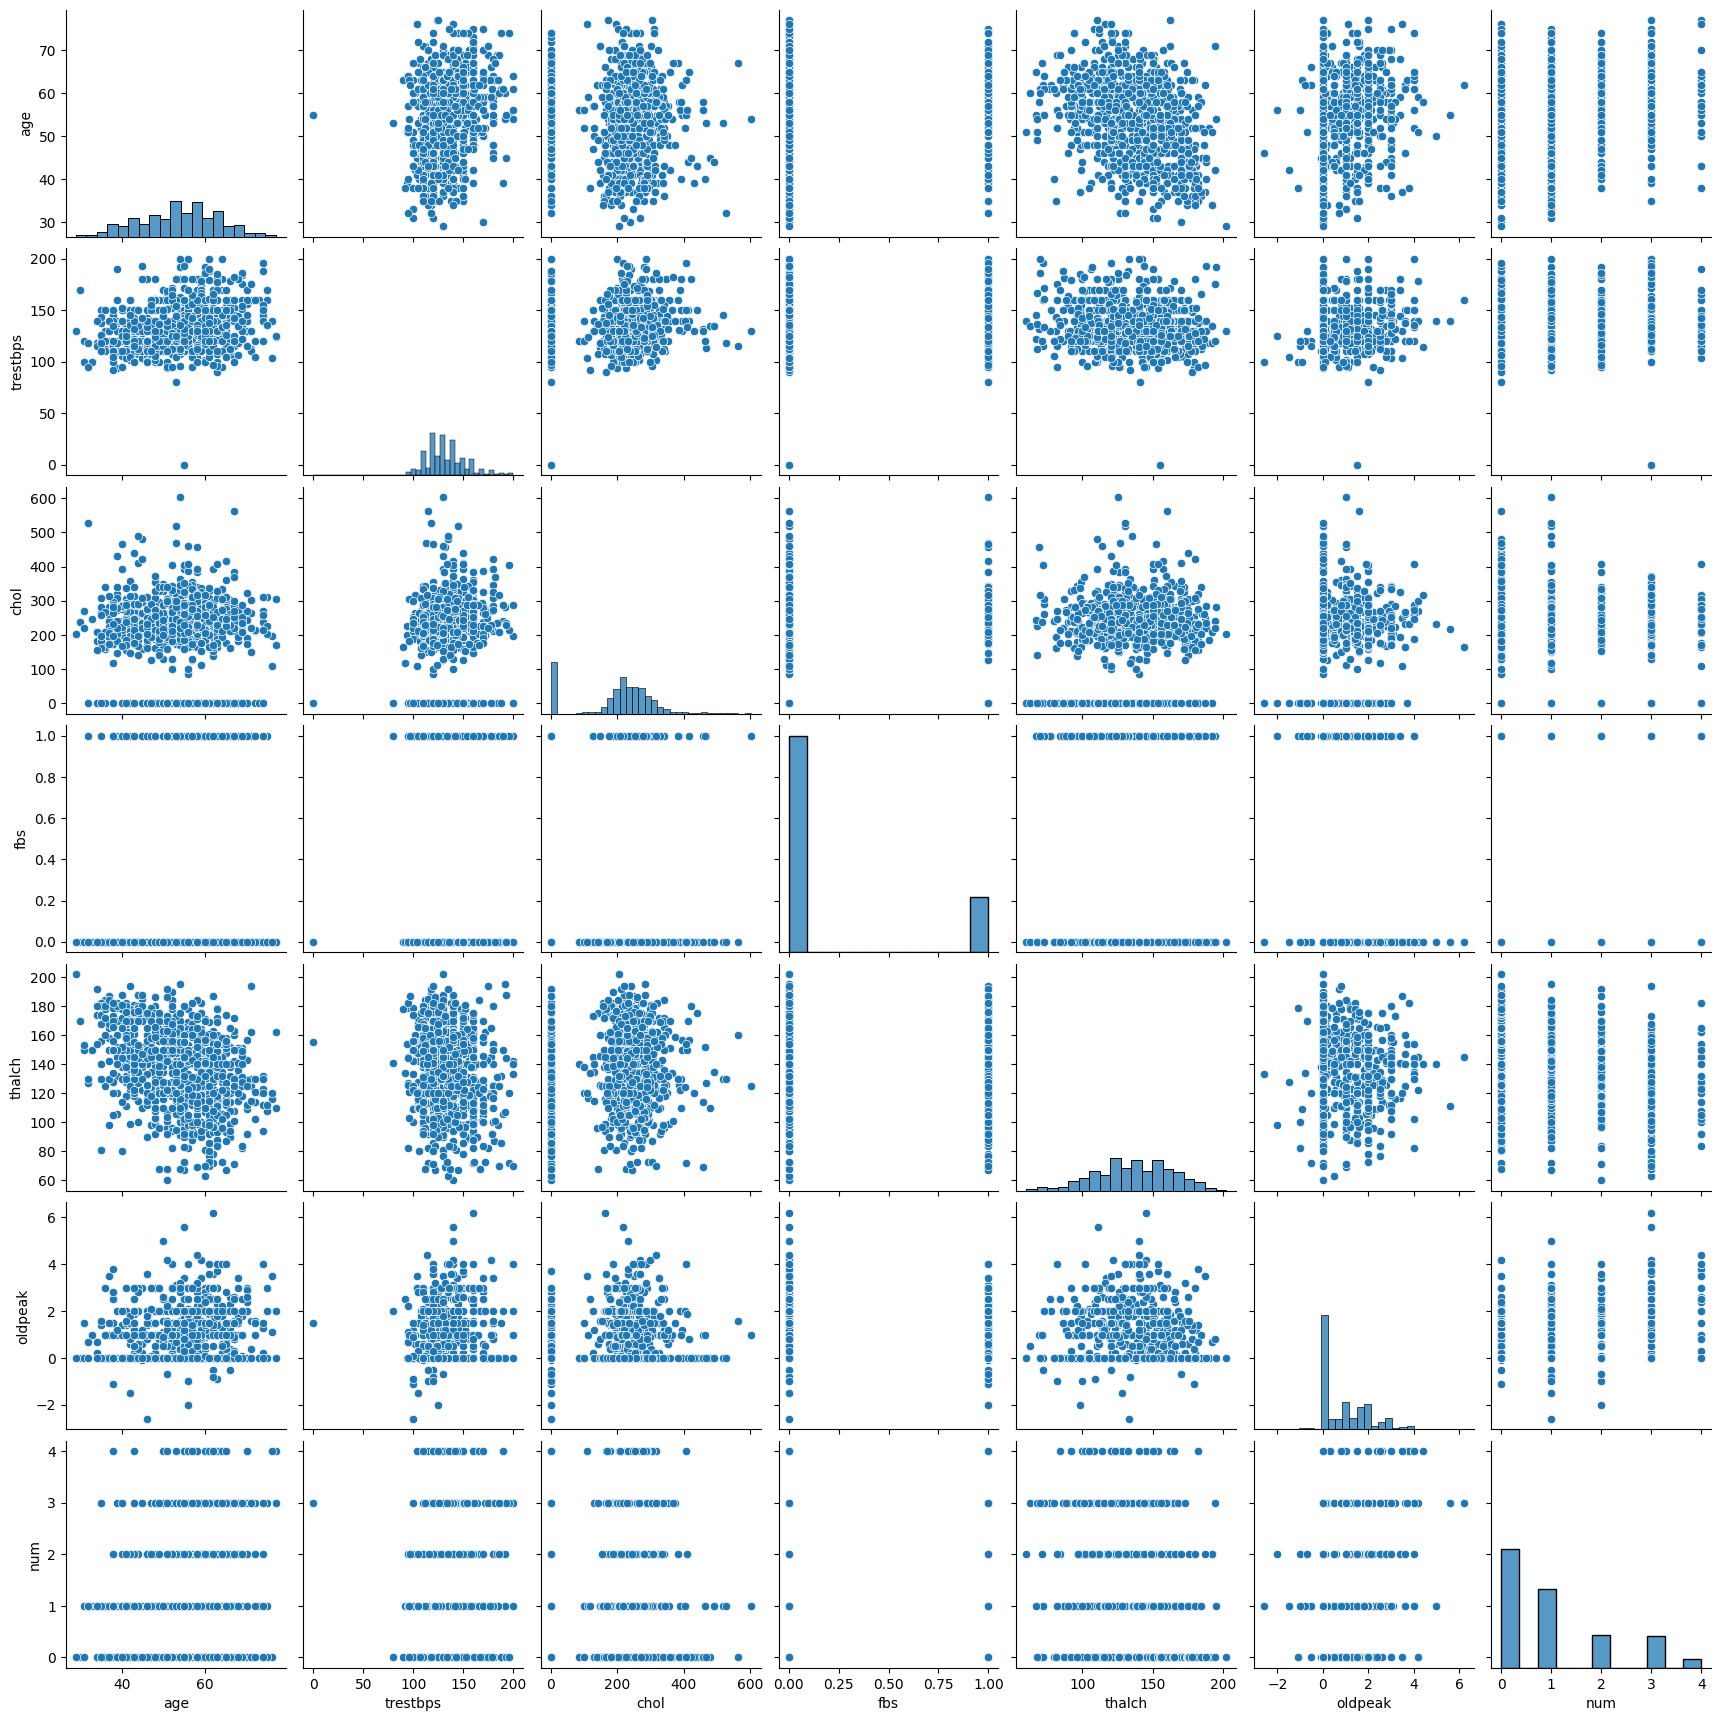

In [53]:
sns.pairplot(data)

<function matplotlib.pyplot.show(close=None, block=None)>

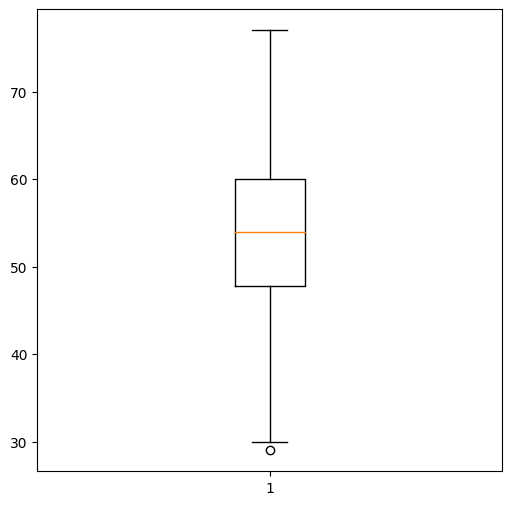

In [54]:
plt.figure(figsize=(6,6))
plt.boxplot(data['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

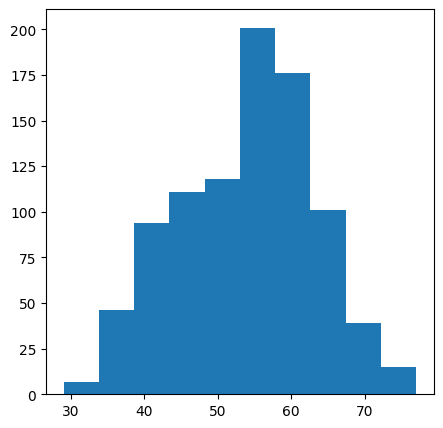

In [55]:
plt.figure(figsize=(5,5))
plt.hist(data['age'])
plt.show

In [95]:
x=data.drop(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak', 'slope', 'thal', 'num'],axis=1)
y=data['age']
x,y

(     age
 0     63
 1     41
 2     57
 3     52
 4     57
 ..   ...
 903   53
 904   62
 905   56
 906   56
 907   57
 
 [908 rows x 1 columns],
 0      63
 1      41
 2      57
 3      52
 4      57
        ..
 903    53
 904    62
 905    56
 906    56
 907    57
 Name: age, Length: 908, dtype: int64)

In [73]:
data=data.dropna()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,reversable defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,TRUE,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4


Decision Tree Classification:

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
data=pd.read_csv(r"/content/sample_data/heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [76]:
from sklearn.preprocessing import LabelEncoder
label_encoder={}

for col in data.columns:
    if data[col].dtype=='object':
        lb[col]=preprocessing.LabelEncoder()
        data['col']=lb[col].fit_transform(data[col])

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,col
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4,2
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4,0
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4,2
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4,1


In [79]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)
x,y



(     age  col
 0     63    0
 1     41    0
 2     57    0
 3     52    0
 4     57    0
 ..   ...  ...
 903   53    2
 904   62    0
 905   56    2
 906   56    1
 907   57    2
 
 [908 rows x 2 columns],
 0      63
 1      41
 2      57
 3      52
 4      57
        ..
 903    53
 904    62
 905    56
 906    56
 907    57
 Name: age, Length: 908, dtype: int64)

In [80]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(181, 2) (727, 2) (181,) (727,)


In [81]:
len(data)

908

In [110]:
# Initialize the decision tree classifier
clf=DecisionTreeClassifier()
# Train the classifier on the training data
clf.fit(x_train,y_train)

DecisionTreeClassifier()

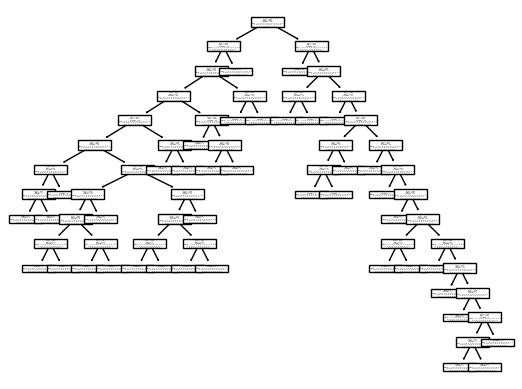

In [111]:
tree.plot_tree(clf);

In [101]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

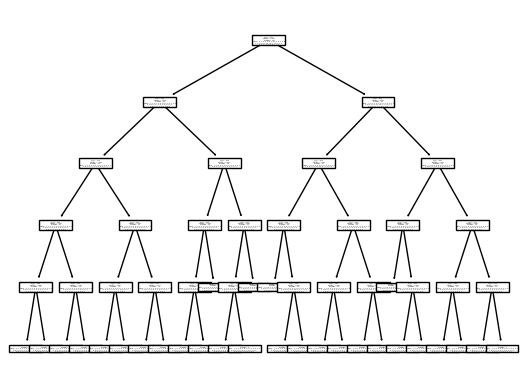

In [102]:
tree.plot_tree(model);

In [103]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

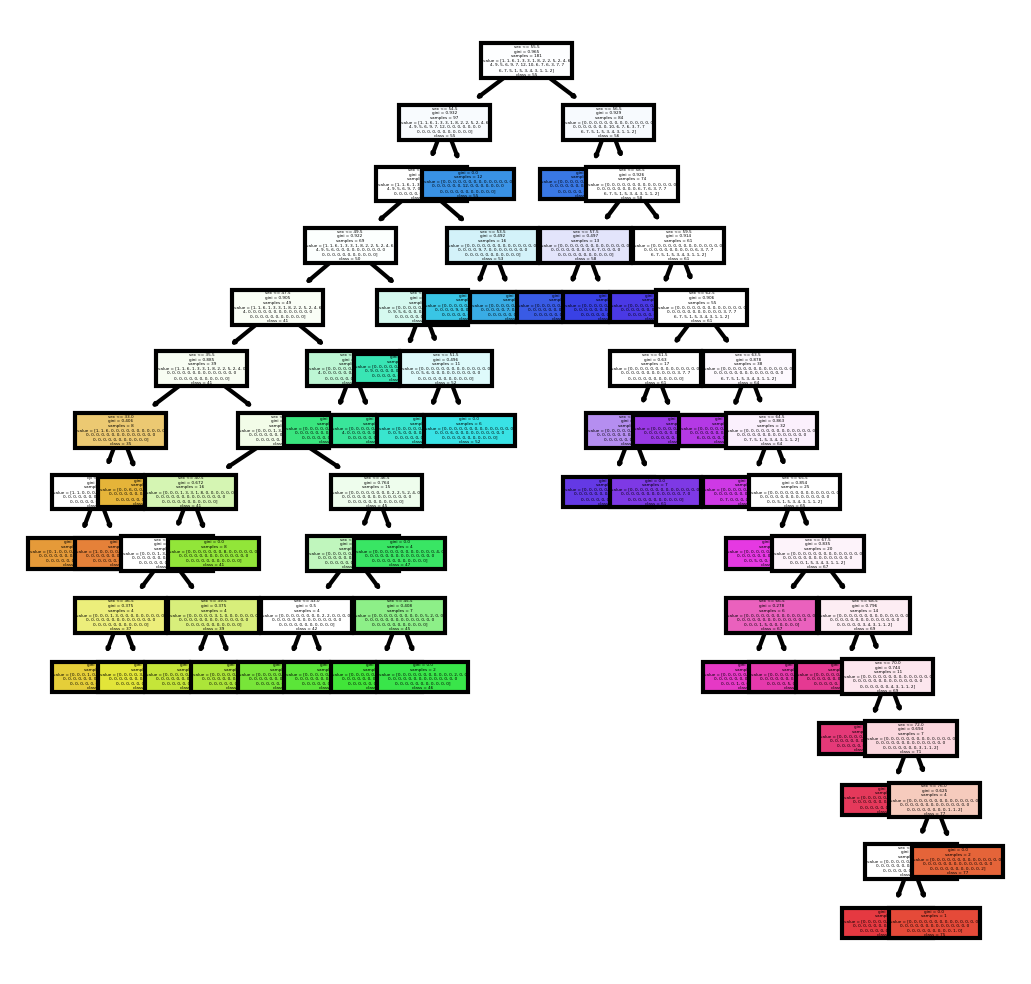

In [107]:
fn=['sex','cp','trestbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak', 'slope', 'thal', 'num']
# Get the actual class names from the fitted model
cn = model.classes_.astype(str).tolist()  # Assuming 'model' is your fitted DecisionTreeClassifier
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)    #dpi= dots per inch
tree.plot_tree(clf,
               feature_names = fn,
               class_names=cn,  # Use the correct class names
               filled = True);

In [112]:
# Predict the target variable for the testing set
y_pred=clf.predict(x_test)
y_pred

array([63, 58, 41, 61, 54, 67, 60, 48, 53, 60, 52, 56, 42, 41, 45, 58, 39,
       49, 50, 61, 54, 42, 51, 69, 57, 71, 51, 66, 54, 41, 51, 61, 51, 46,
       52, 46, 44, 69, 49, 61, 39, 39, 69, 42, 53, 62, 48, 41, 40, 55, 63,
       62, 54, 56, 53, 47, 64, 57, 40, 65, 50, 44, 56, 36, 45, 52, 58, 46,
       65, 37, 47, 62, 50, 42, 41, 53, 54, 49, 51, 62, 47, 54, 45, 51, 51,
       54, 51, 54, 58, 58, 37, 57, 48, 37, 59, 57, 58, 52, 40, 37, 46, 55,
       62, 42, 53, 68, 56, 56, 48, 57, 60, 59, 52, 62, 39, 60, 46, 44, 42,
       52, 52, 63, 55, 57, 51, 46, 50, 57, 71, 41, 57, 42, 56, 37, 52, 65,
       52, 61, 55, 37, 58, 36, 52, 61, 63, 62, 62, 44, 62, 42, 64, 54, 56,
       56, 41, 54, 57, 52, 50, 45, 48, 58, 42, 63, 56, 54, 71, 48, 66, 45,
       49, 31, 42, 56, 44, 63, 41, 52, 65, 53, 54, 45, 42, 29, 73, 41, 49,
       68, 37, 42, 56, 39, 66, 46, 56, 56, 42, 58, 44, 60, 60, 41, 51, 53,
       54, 55, 50, 49, 56, 55, 51, 55, 42, 59, 55, 60, 51, 60, 40, 40, 47,
       48, 42, 42, 48, 73

In [113]:
#Evaluate the performanve of the classifier
classification=classification_report(y_pred,y_test)
classification

'              precision    recall  f1-score   support\n\n          29       0.00      0.00      0.00         1\n          30       0.00      0.00      0.00         0\n          31       1.00      0.25      0.40         4\n          32       0.00      0.00      0.00         0\n          33       0.00      0.00      0.00         0\n          34       0.00      0.00      0.00         0\n          35       1.00      0.43      0.60         7\n          36       1.00      1.00      1.00         5\n          37       1.00      0.33      0.50        24\n          38       0.00      0.00      0.00         0\n          39       0.67      0.57      0.62        14\n          40       0.50      0.60      0.55        10\n          41       1.00      1.00      1.00        16\n          42       1.00      0.40      0.57        40\n          43       0.00      0.00      0.00         0\n          44       1.00      1.00      1.00        17\n          45       1.00      1.00      1.00        13\n       

In [114]:
# Evaluate the performance of the classifier
accuracy = clf.score(x_test,y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8927097661623109


In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 2],
       [0, 0, 0, ..., 0, 0, 0]])

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10)
